In [3]:
import networkx as nx
import osmnx as ox
import requests
import sys,os,os.path
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ox.config(use_cache=True, log_console=True)
ox.__version__

'0.16.1'

In [4]:
stations = pd.read_csv('../../data/stations.csv')

In [5]:
stations.head()

,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,lat,open_ymd,close_ymd,e_status,e_sort
0,1110101,1110101,函館,NaN,NaN,11101,1,040-0063,北海道函館市若松町１２-１３,140.726413,41.773709,1902-12-10,0000-00-00,0,1110101
1,1110102,1110102,五稜郭,NaN,NaN,11101,1,041-0813,函館市亀田本町,140.733539,41.803557,0000-00-00,0000-00-00,0,1110102
2,1110103,1110103,桔梗,NaN,NaN,11101,1,041-0801,北海道函館市桔梗３丁目４１-３６,140.722952,41.846457,1902-12-10,0000-00-00,0,1110103
3,1110104,1110104,大中山,NaN,NaN,11101,1,041-1121,亀田郡七飯町大字大中山,140.713580,41.864641,0000-00-00,0000-00-00,0,1110104
4,1110105,1110105,七飯,NaN,NaN,11101,1,041-1111,亀田郡七飯町字本町,140.688556,41.886971,0000-00-00,0000-00-00,0,1110105


In [1]:
#!sudo apt upgrade -y
#!sudo apt update -y
!sudo apt-get install -y git 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Calculating upgrade... Done
The following packages will be upgraded:
  ca-certificates gcc-10-base libc-bin libc6 libgcc-s1 libstdc++6 libsystemd0
  libudev1 perl-base zlib1g
10 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Need to get 5,984 kB of archives.
After this operation, 39.9 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 perl-base amd64 5.30.0-9ubuntu0.2 [1,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-10-base amd64 10.2.0-5ubuntu1~20.04 [19.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libgcc-s1 amd64 10.2.0-5ubuntu1~20.04 [41.6 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++6 amd64 10.2.0-5ubuntu1~20.04 [503 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6 amd64 2.31-0ubuntu9.1 [2,712 kB]
Get:6 http:/

In [2]:
# 日本語・ローマ字変換ライブラリ `pykakasi` をインストール
!pip install git+https://github.com/miurahr/pykakasi

  Cloning https://github.com/miurahr/pykakasi to /tmp/pip-req-build-sghbs0oo
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached klepto-0.2.0-py2.py3-none-any.whl (85 kB)
  Using cached pox-0.2.9-py2.py3-none-any.whl (30 kB)
  Using cached dill-0.3.3-py2.py3-none-any.whl (81 kB)
  Created wheel for pykakasi: filename=pykakasi-2.0.2.dev11-py3-none-any.whl size=1244607 sha256=99d655edbefb4538a29fc5d3f2575badaf12b93dd7816c46cb7dd20f454d9e1a
  Stored in directory: /tmp/pip-ephem-wheel-cache-hwaztnop/wheels/62/49/c7/6c3498f4d54697dd2876d998349269c7b64871f871ee1180c7
Successfully built pykakasi
  Attempting uninstall: dill
    Found existing installation: dill 0.3.2
    Uninstalling dill-0.3.2:
      Successfully uninstalled dill-0.3.2


In [6]:
from pykakasi import kakasi

kakasi = kakasi()

kakasi.setMode('H', 'a')
kakasi.setMode('K', 'a')
kakasi.setMode('J', 'a')

conv = kakasi.getConverter()

In [7]:
# 駅名のローマ字名を付与
stations['station_name_roman'] = stations['station_name'].apply(lambda name: conv.do(name))
stations

,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,lat,open_ymd,close_ymd,e_status,e_sort,station_name_roman
0,1110101,1110101,函館,NaN,NaN,11101,1,040-0063,北海道函館市若松町１２-１３,140.726413,41.773709,1902-12-10,0000-00-00,0,1110101,hakodate
1,1110102,1110102,五稜郭,NaN,NaN,11101,1,041-0813,函館市亀田本町,140.733539,41.803557,0000-00-00,0000-00-00,0,1110102,goryoukaku
2,1110103,1110103,桔梗,NaN,NaN,11101,1,041-0801,北海道函館市桔梗３丁目４１-３６,140.722952,41.846457,1902-12-10,0000-00-00,0,1110103,kikyou
3,1110104,1110104,大中山,NaN,NaN,11101,1,041-1121,亀田郡七飯町大字大中山,140.713580,41.864641,0000-00-00,0000-00-00,0,1110104,daichuuyama
4,1110105,1110105,七飯,NaN,NaN,11101,1,041-1111,亀田郡七飯町字本町,140.688556,41.886971,0000-00-00,0000-00-00,0,1110105,shichimeshi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10850,9992719,9992719,てだこ浦西,NaN,NaN,99927,47,901-2102,沖縄県浦添市前田三丁目21,127.741861,26.241778,2019-10-01,0000-00-00,0,9992719,tedakouranishi
10851,9992801,1190202,九州鉄道記念館,NaN,NaN,99928,40,800-0000,福岡県北九州市門司区,130.962439,33.944392,0000-00-00,0000-00-00,0,9992801,kyuushuutetsudoukinenkan
10852,9992802,9992802,出光美術館,NaN,NaN,99928,40,800-0000,福岡県北九州市門司区,130.965292,33.947792,0000-00-00,0000-00-00,0,9992802,idemitsubijutsukan
10853,9992803,9992803,ノーフォーク広場,NaN,NaN,99928,40,801-0854,福岡県北九州市門司区旧門司,130.964254,33.955973,0000-00-00,0000-00-00,0,9992803,noofookuhiroba


In [8]:
target_stations = stations[(stations['line_cd'] == 11312) | (stations['line_cd'] == 24001) | (stations['line_cd'] == 25001)]

In [9]:
len(target_stations[target_stations['line_cd'] == 11312]['station_name'])

24

In [10]:
import folium

In [11]:
center_lat, center_lon = (35.651820534474,139.54461236426)

_map = folium.Map(location=[center_lat, center_lon], zoom_start=12)

for _, station in target_stations.iterrows():
    color = 'red' if station['line_cd'] == 11312 else 'blue' if station['line_cd'] == 25001 else 'pink'
    folium.Marker([station.lat, station.lon], popup=str(station['station_name']), icon=folium.Icon(color=color)).add_to(_map)

_map

In [15]:
#駅の800m範囲内のグラフ構造の配列を取得
def get_stats(data):
    wurster_hall = (data['lat'], data['lon'])
    one_mile = 800 #meters
    G = ox.graph_from_point(wurster_hall, dist=one_mile, network_type='drive')

    # what sized area does our network cover in square meters?
    G_proj = ox.project_graph(G)
    nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
    graph_area_m = nodes_proj.unary_union.convex_hull.area
    
    # show some basic stats about the network
    stats = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
    return pd.Series(stats)
    

In [16]:
#駅の800m範囲内のグラフ構造の配列を取得
stats_list = target_stations.apply(get_stats, axis=1)
stats_list

,n,m,k_avg,intersection_count,streets_per_node_avg,streets_per_node_counts,streets_per_node_proportion,edge_length_total,edge_length_avg,street_length_total,street_length_avg,street_segments_count,node_density_km,intersection_density_km,edge_density_km,street_density_km,circuity_avg,self_loop_proportion,clean_intersection_count,clean_intersection_density_km
1504,427,800,3.747073,420,3.435597,"{0: 0, 1: 7, 2: 4, 3: 228, 4: 174, 5: 12, 6: 2}","{0: 0.0, 1: 0.01639344262295082, 2: 0.00936768...",59421.896,74.277370,50774.285,74.668066,680,189.211808,186.109975,26330.970417,22499.049783,1.014035,0.001250,239,105.905438
1505,972,1945,4.002058,959,3.353909,"{0: 0, 1: 13, 2: 1, 3: 603, 4: 341, 5: 12, 6: 2}","{0: 0.0, 1: 0.013374485596707819, 2: 0.0010288...",104898.951,53.932623,85859.930,54.548875,1574,403.986454,398.583343,43598.513632,35685.441016,1.010215,0.000514,511,212.383825
1506,1110,2414,4.349550,1082,3.261261,"{0: 0, 1: 28, 2: 0, 3: 745, 4: 329, 5: 7, 6: 1}","{0: 0.0, 1: 0.025225225225225224, 2: 0.0, 3: 0...",111519.846,46.197119,81437.288,46.668933,1745,441.539940,430.401996,44360.780311,32394.428182,1.008452,0.000000,543,215.996565
1507,496,1111,4.479839,416,2.828629,"{0: 0, 1: 80, 2: 1, 3: 340, 4: 74, 5: 1}","{0: 0.0, 1: 0.16129032258064516, 2: 0.00201612...",70832.310,63.755455,44347.931,66.092297,671,202.694435,170.001784,28946.199668,18123.142752,1.041690,0.000000,257,105.025141
1508,720,1628,4.522222,687,3.163889,"{0: 0, 1: 33, 2: 2, 3: 513, 4: 162, 5: 7, 6: 2...","{0: 0.0, 1: 0.04583333333333333, 2: 0.00277777...",87927.938,54.009790,60552.399,55.400182,1093,295.499671,281.955936,36087.051021,24851.686072,1.022940,0.000000,396,162.524819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595,351,946,5.390313,289,2.794872,"{0: 0, 1: 62, 2: 0, 3: 237, 4: 52}","{0: 0.0, 1: 0.17663817663817663, 2: 0.0, 3: 0....",71237.824,75.304254,35618.912,75.304254,473,181.181942,149.178294,36772.100506,18386.050253,1.040310,0.000000,199,102.721386
5596,496,1344,5.419355,421,2.844758,"{0: 0, 1: 75, 2: 0, 3: 348, 4: 73}","{0: 0.0, 1: 0.15120967741935484, 2: 0.0, 3: 0....",93861.951,69.837761,47059.300,69.717481,675,215.064280,182.544480,40698.292174,20404.787249,1.042472,0.000000,274,118.805671
5597,486,1285,5.288066,392,2.730453,"{0: 0, 1: 94, 2: 0, 3: 335, 4: 57}","{0: 0.0, 1: 0.1934156378600823, 2: 0.0, 3: 0.6...",85852.900,66.811595,43299.434,66.820114,648,237.598837,191.643507,41972.323493,21168.508588,1.048586,0.000000,252,123.199397
5598,414,1032,4.985507,313,2.586957,"{0: 0, 1: 101, 2: 0, 3: 282, 4: 31}","{0: 0.0, 1: 0.24396135265700483, 2: 0.0, 3: 0....",72914.247,70.653340,36636.327,70.590225,519,202.185027,152.859695,35609.103911,17892.069503,1.052141,0.000000,211,103.045992


In [19]:
len(stats_list)

103

In [20]:
target_stations_with_stats = pd.concat([target_stations, stats_list], axis=1)

In [23]:
target_stations_with_stats.to_csv('../../data/target_three_stations_with_stats.csv')

In [24]:
target_stations_with_stats = pd.read_csv('../../data/target_three_stations_with_stats.csv')

In [25]:
target_stations_with_stats

,Unnamed: 0,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,...,street_length_avg,street_segments_count,node_density_km,intersection_density_km,edge_density_km,street_density_km,circuity_avg,self_loop_proportion,clean_intersection_count,clean_intersection_density_km
0,1504,1131201,1130101,東京,NaN,NaN,11312,13,100-0005,東京都千代田区丸の内一丁目,...,74.668066,680,189.211808,186.109975,26330.970417,22499.049783,1.014035,0.001250,239,105.905438
1,1505,1131202,1130223,神田,NaN,NaN,11312,13,101-0044,東京都千代田区鍛冶町二丁目13-1,...,54.548875,1574,403.986454,398.583343,43598.513632,35685.441016,1.010215,0.000514,511,212.383825
2,1506,1131203,1131203,御茶ノ水,NaN,NaN,11312,13,101-0062,千代田区神田駿河台２丁目,...,46.668933,1745,441.539940,430.401996,44360.780311,32394.428182,1.008452,0.000000,543,215.996565
3,1507,1131207,1131102,四ツ谷,NaN,NaN,11312,13,160-0004,東京都新宿区四谷一丁目,...,66.092297,671,202.694435,170.001784,28946.199668,18123.142752,1.041690,0.000000,257,105.025141
4,1508,1131211,1130208,新宿,NaN,NaN,11312,13,160-0022,東京都新宿区新宿三丁目38-1,...,55.400182,1093,295.499671,281.955936,36087.051021,24851.686072,1.022940,0.000000,396,162.524819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,5595,2500143,2500143,栢山,NaN,NaN,25001,14,250-0852,小田原市栢山,...,75.304254,473,181.181942,149.178294,36772.100506,18386.050253,1.040310,0.000000,199,102.721386
99,5596,2500144,2500144,富水,NaN,NaN,25001,14,250-0853,小田原市堀之内,...,69.717481,675,215.064280,182.544480,40698.292174,20404.787249,1.042472,0.000000,274,118.805671
100,5597,2500145,2500145,螢田,NaN,NaN,25001,14,250-0865,小田原市蓮正寺,...,66.820114,648,237.598837,191.643507,41972.323493,21168.508588,1.048586,0.000000,252,123.199397
101,5598,2500146,2500146,足柄,NaN,NaN,25001,14,250-0001,小田原市扇町３丁目,...,70.590225,519,202.185027,152.859695,35609.103911,17892.069503,1.052141,0.000000,211,103.045992


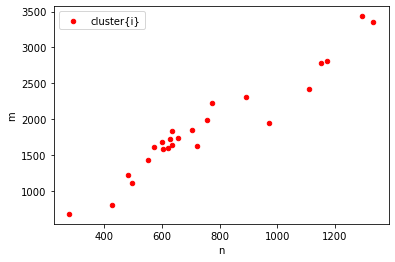

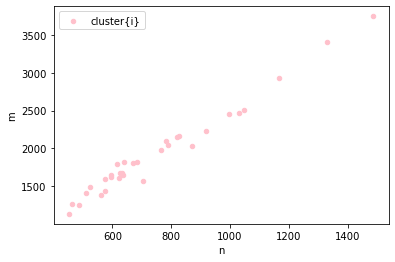

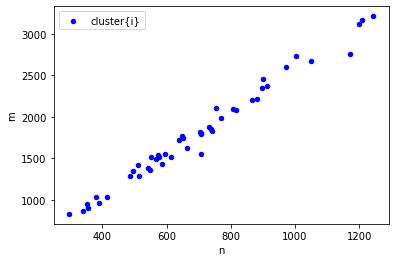

In [26]:
# 路線ごとの交差点数、道路数のグラフ化
ax = None
colors = {11312: 'red', 24001: 'pink', 25001: 'blue'}
for i, station in target_stations_with_stats.groupby('line_cd'):
    station.plot.scatter(x='n', y='m', color=colors[i], label='cluster{i}', ax=ax)

In [30]:
chuo_stations = target_stations_with_stats[target_stations_with_stats['line_cd'] == 11312]
keio_stations = target_stations_with_stats[target_stations_with_stats['line_cd'] == 24001]
odakyu_stations = target_stations_with_stats[target_stations_with_stats['line_cd'] == 25001]

(array([[1., 0., 1., 2., 2., 6., 1., 3., 1., 0., 1., 1., 0., 1., 2., 0.,
         1., 1., 0., 0.],
        [0., 0., 1., 3., 4., 7., 3., 1., 4., 2., 1., 1., 2., 0., 1., 0.,
         0., 1., 0., 1.]]),
 array([ 277. ,  337.5,  398. ,  458.5,  519. ,  579.5,  640. ,  700.5,
         761. ,  821.5,  882. ,  942.5, 1003. , 1063.5, 1124. , 1184.5,
        1245. , 1305.5, 1366. , 1426.5, 1487. ]),
 <a list of 2 BarContainer objects>)

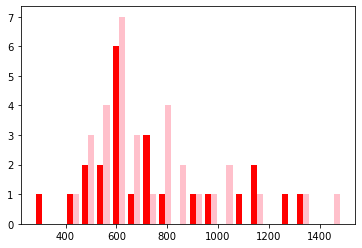

In [31]:
plt.hist([chuo_stations['n'], keio_stations['n']], bins = 20, color=['red', 'pink'])


(array([[2., 0., 1., 1., 1., 2., 6., 2., 2., 0., 2., 1., 0., 2., 0., 0.,
         0., 2., 0., 0.],
        [0., 0., 1., 2., 3., 3., 6., 4., 3., 3., 1., 3., 0., 0., 1., 0.,
         0., 1., 0., 1.]]),
 array([ 679. ,  832.3,  985.6, 1138.9, 1292.2, 1445.5, 1598.8, 1752.1,
        1905.4, 2058.7, 2212. , 2365.3, 2518.6, 2671.9, 2825.2, 2978.5,
        3131.8, 3285.1, 3438.4, 3591.7, 3745. ]),
 <a list of 2 BarContainer objects>)

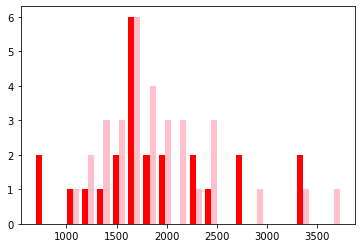

In [32]:
plt.hist([chuo_stations['m'], keio_stations['m']], bins = 20, color=['red', 'pink'])


In [33]:
# k-means法を使うためのインポート
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# データの列の絞り込み
stations_sub = target_stations_with_stats[['n','m']]

# 標準化
sc = StandardScaler()
sc.fit(stations_sub)
stations_sub_std = sc.transform(stations_sub)

0    45
1    40
2    18
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

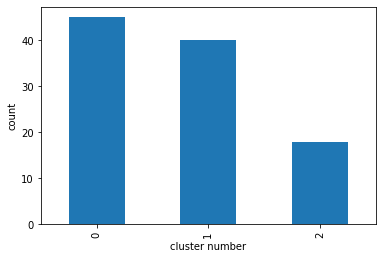

In [34]:
# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=3, random_state=0)

# クラスターの重心を計算
kmeans.fit(stations_sub_std)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number', index=target_stations_with_stats.index)

# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

Text(0, 0.5, 'Distortion')

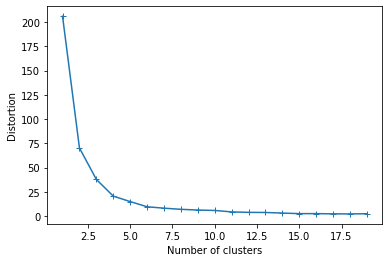

In [35]:
# エルボー方による推定。クラスター数を1から20に増やして、それぞれの距離の総和を求める
dist_list =[]
for i in range(1,20):
    kmeans= KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(stations_sub_std)
    dist_list.append(kmeans.inertia_)
    
# グラフを表示
plt.plot(range(1,20), dist_list,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

In [36]:
# 駅のデータにクラスター番号のデータを結合
stations_with_cluster = pd.concat([target_stations_with_stats, pd.Series(labels, index=target_stations_with_stats.index)], axis=1)

# 先頭の5行を表示
stations_with_cluster.head()

,Unnamed: 0,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,...,street_segments_count,node_density_km,intersection_density_km,edge_density_km,street_density_km,circuity_avg,self_loop_proportion,clean_intersection_count,clean_intersection_density_km,cluster_number
0,1504,1131201,1130101,東京,NaN,NaN,11312,13,100-0005,東京都千代田区丸の内一丁目,...,680,189.211808,186.109975,26330.970417,22499.049783,1.014035,0.001250,239,105.905438,1
1,1505,1131202,1130223,神田,NaN,NaN,11312,13,101-0044,東京都千代田区鍛冶町二丁目13-1,...,1574,403.986454,398.583343,43598.513632,35685.441016,1.010215,0.000514,511,212.383825,0
2,1506,1131203,1131203,御茶ノ水,NaN,NaN,11312,13,101-0062,千代田区神田駿河台２丁目,...,1745,441.539940,430.401996,44360.780311,32394.428182,1.008452,0.000000,543,215.996565,2
3,1507,1131207,1131102,四ツ谷,NaN,NaN,11312,13,160-0004,東京都新宿区四谷一丁目,...,671,202.694435,170.001784,28946.199668,18123.142752,1.041690,0.000000,257,105.025141,1
4,1508,1131211,1130208,新宿,NaN,NaN,11312,13,160-0022,東京都新宿区新宿三丁目38-1,...,1093,295.499671,281.955936,36087.051021,24851.686072,1.022940,0.000000,396,162.524819,0


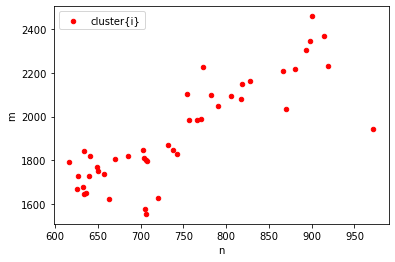

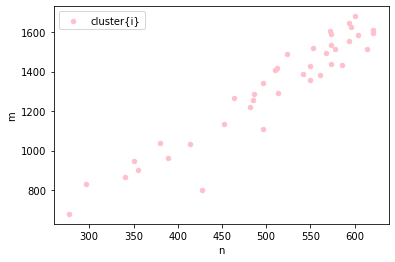

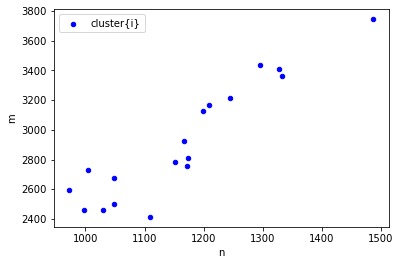

In [38]:
stations_0 = stations_with_cluster[stations_with_cluster['cluster_number'] == 0]
stations_1 = stations_with_cluster[stations_with_cluster['cluster_number'] == 1]
stations_2 = stations_with_cluster[stations_with_cluster['cluster_number'] == 2]
# クラスタリング結果のグラフ化
ax = None
colors = ['red', 'pink', 'blue']
for i, station in stations_with_cluster.groupby('cluster_number'):
    station.plot.scatter(x='n', y='m', color=colors[i], label='cluster{i}', ax=ax)

In [39]:
# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_line_cd = stations_with_cluster.groupby(['cluster_number', 'line_cd']).size().unstack().fillna(0)
cross_cluster_line_cd

line_cd,11312,24001,25001
cluster_number,,,
0,10,15,20
1,9,11,20
2,5,6,7


<AxesSubplot:xlabel='line_cd', ylabel='cluster_number'>

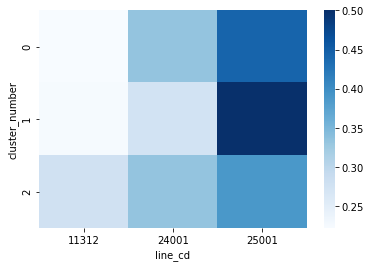

In [40]:
sns.heatmap(cross_cluster_line_cd.apply(lambda x : x/x.sum(), axis=1), cmap='Blues')

In [41]:
print([station['station_name'] for _, station in stations_with_cluster.iterrows() if (station['cluster_number'] == 0)])

['神田', '新宿', '西荻窪', '三鷹', '武蔵境', '東小金井', '武蔵小金井', '日野', '八王子', '西八王子', '新宿', '八幡山', '芦花公園', '千歳烏山', 'つつじヶ丘', '柴崎', '国領', '布田', '調布', '西調布', '多磨霊園', '高幡不動', '平山城址公園', '北野', '京王八王子', '新宿', '代々木八幡', '代々木上原', '千歳船橋', '祖師ヶ谷大蔵', '喜多見', '狛江', '読売ランド前', '百合ヶ丘', '新百合ヶ丘', '玉川学園前', '町田', '相模大野', '小田急相模原', '相武台前', '本厚木', '愛甲石田', '伊勢原', '東海大学前', '秦野']


In [42]:
print([station['station_name'] for _, station in stations_with_cluster.iterrows() if (station['cluster_number'] == 1)])

['東京', '四ツ谷', '吉祥寺', '国分寺', '西国分寺', '国立', '立川', '豊田', '高尾', '仙川', '飛田給', '武蔵野台', '東府中', '府中', '分倍河原', '中河原', '聖蹟桜ヶ丘', '百草園', '南平', '長沼', '南新宿', '参宮橋', '成城学園前', '和泉多摩川', '登戸', '向ヶ丘遊園', '生田', '柿生', '鶴川', '座間', '海老名', '厚木', '鶴巻温泉', '新松田', '開成', '栢山', '富水', '螢田', '足柄', '小田原']


In [43]:
print([station['station_name'] for _, station in stations_with_cluster.iterrows() if (station['cluster_number'] == 2)])

['御茶ノ水', '中野', '高円寺', '阿佐ケ谷', '荻窪', '笹塚', '代田橋', '明大前', '下高井戸', '桜上水', '上北沢', '東北沢', '下北沢', '世田谷代田', '梅ヶ丘', '豪徳寺', '経堂', '渋沢']
